In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim import corpora
from gensim.models.ldamodel import LdaModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from scipy.sparse import csr_matrix

In [30]:
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
reviews_df = pd.read_csv("./data/animes.csv")
reviews_df.head(10)

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...
5,37510,Mob Psycho 100 II,"Shigeo ""Mob"" Kageyama is now maturing and unde...","['Action', 'Slice of Life', 'Comedy', 'Superna...","Jan 7, 2019 to Apr 1, 2019",13.0,442310,176,21.0,8.89,https://cdn.myanimelist.net/images/anime/1918/...,https://myanimelist.net/anime/37510/Mob_Psycho...
6,199,Sen to Chihiro no Kamikakushi,"Stubborn, spoiled, and naïve, 10-year-old Chih...","['Adventure', 'Supernatural', 'Drama']","Jul 20, 2001",1.0,913212,40,20.0,8.90,https://cdn.myanimelist.net/images/anime/6/795...,https://myanimelist.net/anime/199/Sen_to_Chihi...
7,38000,Kimetsu no Yaiba,"Ever since the death of his father, the burden...","['Action', 'Demons', 'Historical', 'Shounen', ...","Apr 6, 2019 to Sep 28, 2019",26.0,575037,106,19.0,8.92,https://cdn.myanimelist.net/images/anime/1286/...,https://myanimelist.net/anime/38000/Kimetsu_no...
8,35247,Owarimonogatari 2nd Season,Following an encounter with oddity specialist ...,"['Mystery', 'Comedy', 'Supernatural', 'Vampire']","Aug 12, 2017 to Aug 13, 2017",7.0,189944,573,18.0,8.93,https://cdn.myanimelist.net/images/anime/6/873...,https://myanimelist.net/anime/35247/Owarimonog...
9,2904,Code Geass: Hangyaku no Lelouch R2,"One year has passed since the Black Rebellion,...","['Action', 'Military', 'Sci-Fi', 'Super Power'...","Apr 6, 2008 to Sep 28, 2008",25.0,992196,27,17.0,8.93,https://cdn.myanimelist.net/images/anime/4/939...,https://myanimelist.net/anime/2904/Code_Geass_...


In [32]:
reviews_df = reviews_df.drop_duplicates(subset=['link'], keep='first')

In [33]:
def get_sentiment(text):
    if not isinstance(text, str):
        text = ''
    return sid.polarity_scores(text)

sid = SentimentIntensityAnalyzer()

reviews_df['synopsis'] = reviews_df['synopsis'].fillna('')
reviews_df['title_sentiment'] = reviews_df['title'].apply(get_sentiment)
reviews_df['synopsis_sentiment'] = reviews_df['synopsis'].apply(get_sentiment)

reviews_df[['title_neg', 'title_neu', 'title_pos', 'title_compound']] = reviews_df['title_sentiment'].apply(pd.Series)
reviews_df[['synopsis_neg', 'synopsis_neu', 'synopsis_pos', 'synopsis_compound']] = reviews_df['synopsis_sentiment'].apply(pd.Series)

In [34]:
reviews_df.head()

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,...,title_sentiment,synopsis_sentiment,title_neg,title_neu,title_pos,title_compound,synopsis_neg,synopsis_neu,synopsis_pos,synopsis_compound
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.06, 'neu': 0.837, 'pos': 0.103, 'com...",0.000,1.000,0.0,0.000,0.060,0.837,0.103,0.7665
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,...,"{'neg': 0.355, 'neu': 0.645, 'pos': 0.0, 'comp...","{'neg': 0.031, 'neu': 0.814, 'pos': 0.155, 'co...",0.355,0.645,0.0,-0.296,0.031,0.814,0.155,0.9704
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.044, 'neu': 0.802, 'pos': 0.154, 'co...",0.000,1.000,0.0,0.000,0.044,0.802,0.154,0.9724
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.086, 'neu': 0.863, 'pos': 0.05, 'com...",0.000,1.000,0.0,0.000,0.086,0.863,0.050,-0.8201
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.087, 'neu': 0.754, 'pos': 0.159, 'co...",0.000,1.000,0.0,0.000,0.087,0.754,0.159,0.9390


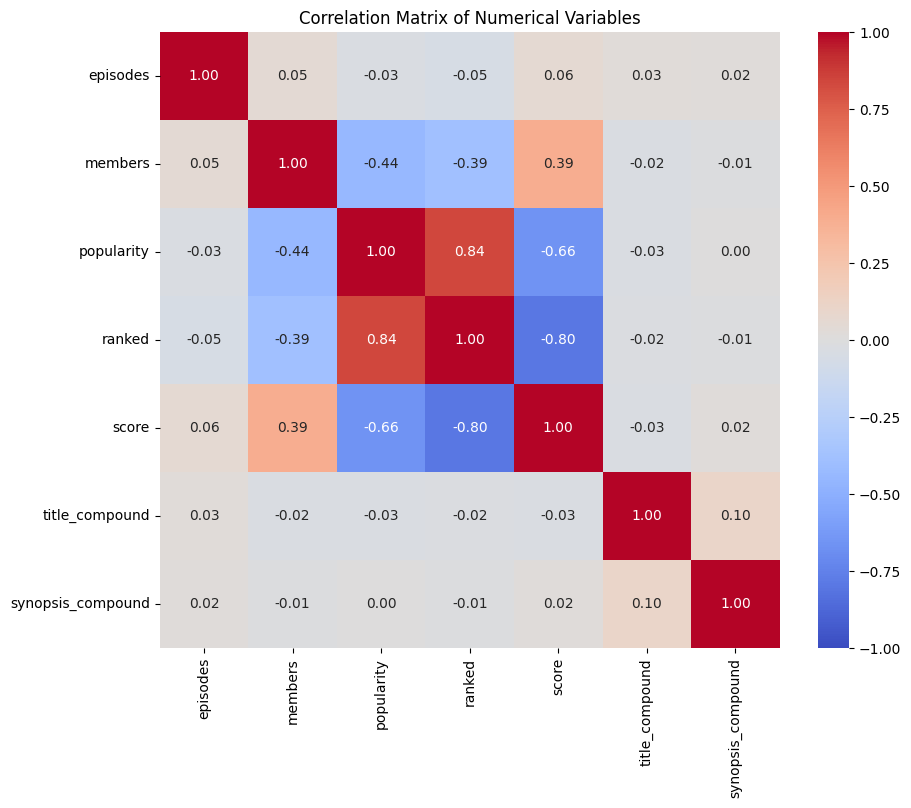

In [35]:
corr_matrix = reviews_df[['episodes', 'members', 'popularity', 'ranked', 'score', 'title_compound', 'synopsis_compound']].corr()

plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

In [36]:
stop_words = set(stopwords.words('english'))
stop_words.update(['anime','source'])
reviews_df['synopsis_clean'] = reviews_df['synopsis'].str.replace('[Written by MAL Rewrite]', '', regex=False)

def preprocess(text):
    tokens = [word for word in nltk.word_tokenize(text.lower()) if word.isalpha()]
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

reviews_df['synopsis_tokens'] = reviews_df['synopsis_clean'].apply(preprocess)
dictionary = corpora.Dictionary(reviews_df['synopsis_tokens'])
corpus = [dictionary.doc2bow(text) for text in reviews_df['synopsis_tokens']]

lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

lda_vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_vis)

In [37]:
def preprocess(text):
    tokens = [word for word in text.lower().split() if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)

reviews_df['synopsis_clean'] = reviews_df['synopsis_clean'].apply(preprocess)

def extract_keywords(text):
    if not text.strip(): 
        return []
    vectorizer = TfidfVectorizer(stop_words='english', max_features=10)
    try:
        tfidf_matrix = vectorizer.fit_transform([text])
        feature_names = vectorizer.get_feature_names_out()
        tfidf_scores = zip(feature_names, tfidf_matrix.toarray()[0])
        sorted_tfidf_scores = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)
        top_keywords = [word for word, score in sorted_tfidf_scores[:5]]
        return top_keywords
    except ValueError:
        return []

reviews_df['keywords'] = reviews_df['synopsis_clean'].apply(extract_keywords)

reviews_df[['title', 'synopsis_clean', 'keywords']].head(10)

,title,synopsis_clean,keywords
0,Haikyuu!! Second Season,following participation karasuno high school v...,"[volleyball, hope, karasuno, team, teams]"
1,Shigatsu wa Kimi no Uso,music accompanies path human prodigious pianis...,"[kousei, music, accompanies, note, passing]"
2,Made in Abyss,gaping chasm stretching depths filled mysterio...,"[chasm, come, mysterious, whistle, white]"
3,Fullmetal Alchemist: Brotherhood,order something something equal value must alc...,"[alphonse, brothers, edward, colonel, equivalent]"
4,Kizumonogatari III: Reiketsu-hen,helping revive legendary vampire koyomi ararag...,"[araragi, vampire, possible, turn, powerful]"
5,Mob Psycho 100 II,shigeo kageyama maturing understanding role su...,"[reigen, supernatural, mob, psychic, remains]"
6,Sen to Chihiro no Kamikakushi,chihiro ogino less pleased parents discover ab...,"[parents, chihiro, meets, place, pleased]"
7,Kimetsu no Yaiba,ever since death burden supporting family fall...,"[tanjirou, family, demons, able, mysterious]"
8,Owarimonogatari 2nd Season,following encounter oddity specialist izuko hi...,"[araragi, student, alarmingly, mystery, oddity]"
9,Code Geass: Hangyaku no Lelouch R2,one year passed since black failed uprising ho...,"[black, accept, masked, mastermind, memory]"


In [38]:
exploded_data = reviews_df[['keywords', 'members', 'popularity', 'ranked', 'score']].explode('keywords')

keyword_metrics = exploded_data.groupby('keywords').agg({
    'members': 'mean',
    'popularity': 'mean',
    'ranked': 'mean',
    'score': 'mean'
}).reset_index()

highest_members = keyword_metrics.sort_values(by='members', ascending=False).head(10)
best_popularity = keyword_metrics.sort_values(by='popularity').head(10)
best_ranking = keyword_metrics.sort_values(by='ranked').head(10)
best_score = keyword_metrics.sort_values(by='score', ascending=False).head(10)

highest_members, best_popularity, best_ranking, best_score

(         keywords    members  popularity  ranked  score
 8816       mikasa  1754979.0         2.0   111.0  8.470
 4334   equivalent  1615084.0         4.0     1.0  9.230
 11955        rize  1346036.0         6.0   674.0  7.930
 10252    otonashi  1247282.0        10.0   284.0  8.250
 14656    yukiteru  1205275.0        13.0  1043.0  7.740
 3604         deus  1205275.0        13.0  1043.0  7.740
 13549       taiga  1153720.0        14.0   204.0  8.340
 8983      mitsuha  1139878.0        15.0     4.0  9.090
 6681        izuku  1123551.5        17.0   129.0  8.475
 7019       kaneki  1123402.5        24.5  1657.5  7.605,
          keywords    members  popularity  ranked  score
 8816       mikasa  1754979.0         2.0   111.0  8.470
 4334   equivalent  1615084.0         4.0     1.0  9.230
 11955        rize  1346036.0         6.0   674.0  7.930
 10252    otonashi  1247282.0        10.0   284.0  8.250
 14656    yukiteru  1205275.0        13.0  1043.0  7.740
 3604         deus  1205275.0 

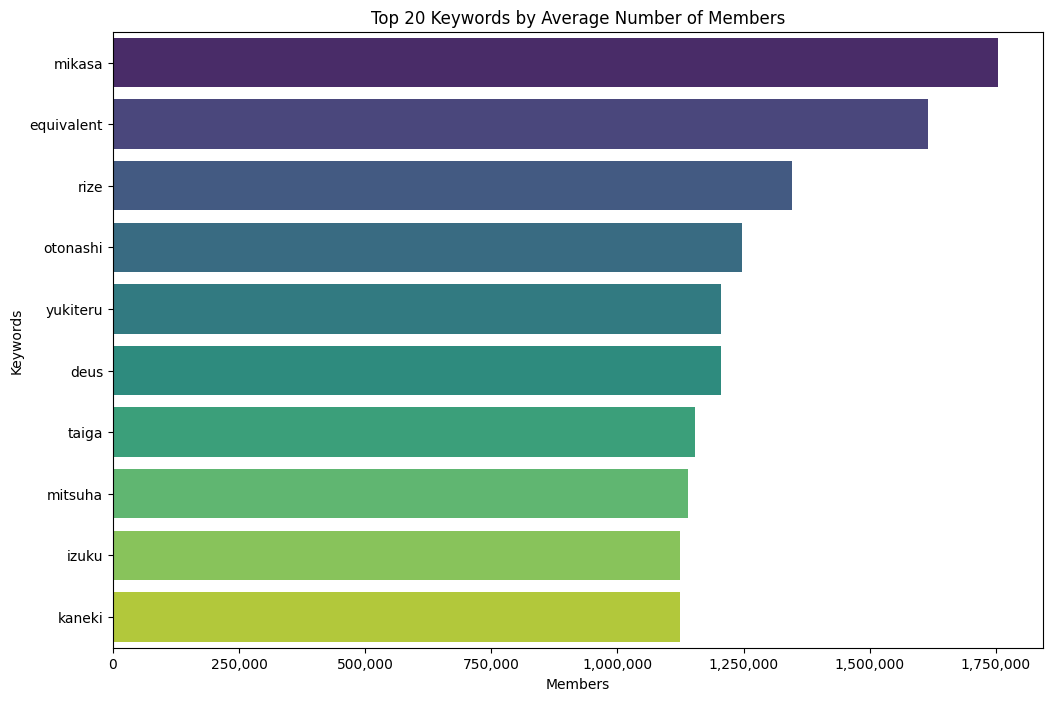

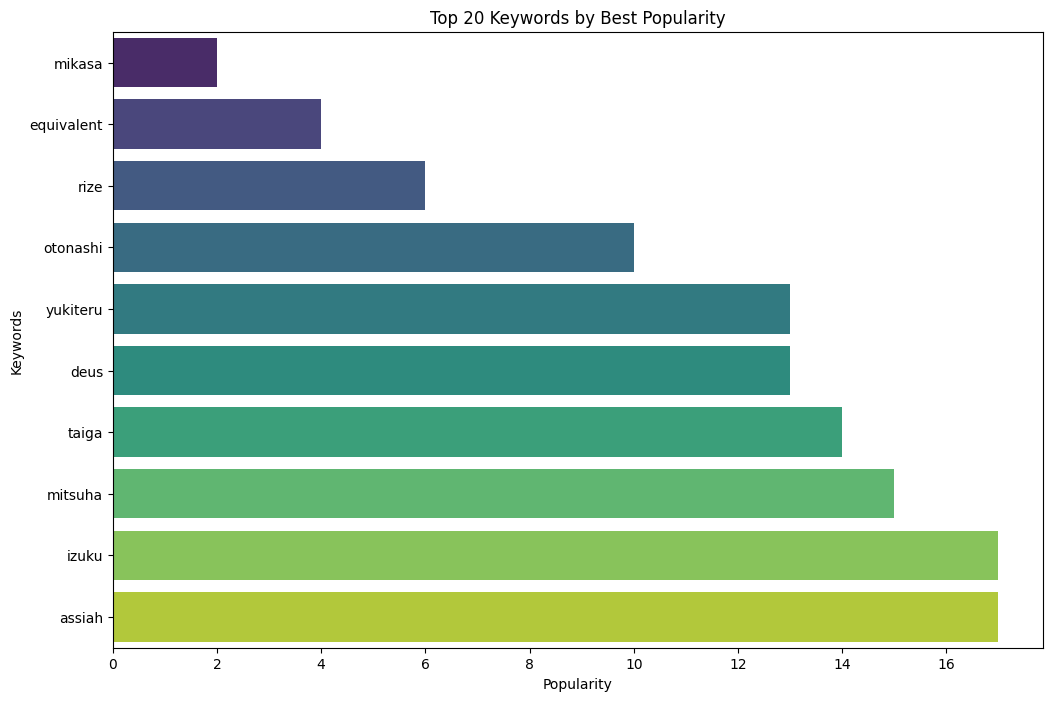

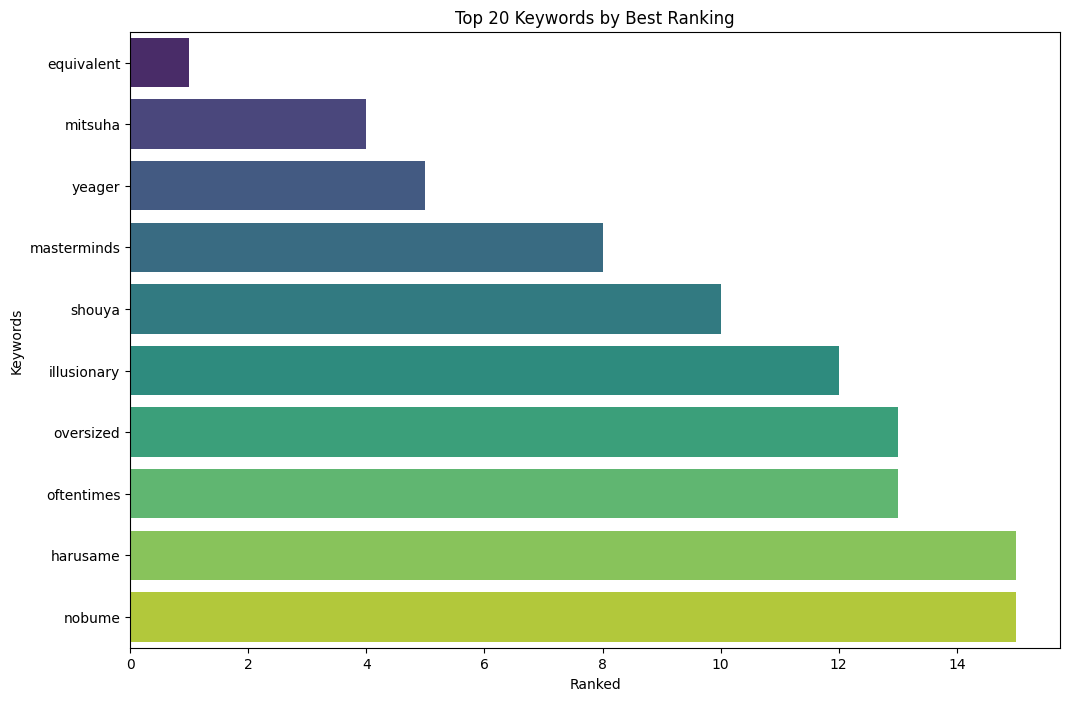

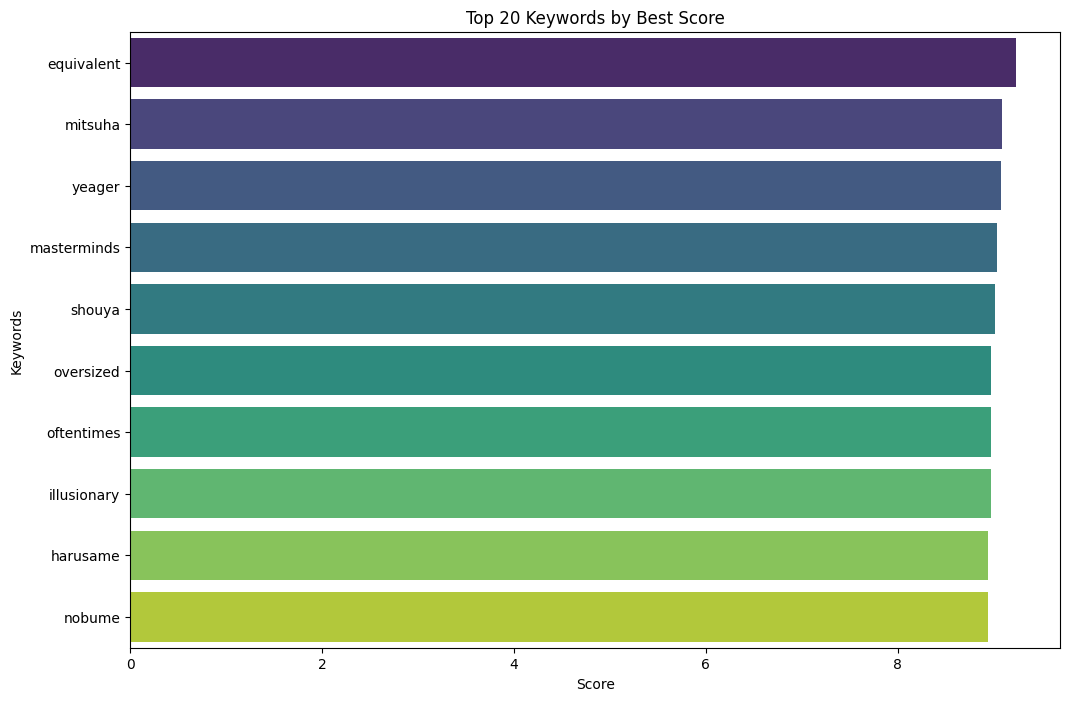

In [39]:
def plot_keyword_metrics(df, metric, title):
    plt.figure(figsize=(12, 8))
    sns.barplot(x=metric, y='keywords', data=df, palette='viridis', hue='keywords', dodge=False)
    plt.title(title)
    plt.xlabel(metric.capitalize())
    plt.ylabel('Keywords')
    plt.legend([],[], frameon=False)
    if metric == 'members':
        plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    
    plt.show()

plot_keyword_metrics(highest_members, 'members', 'Top 20 Keywords by Average Number of Members')
plot_keyword_metrics(best_popularity, 'popularity', 'Top 20 Keywords by Best Popularity')
plot_keyword_metrics(best_ranking, 'ranked', 'Top 20 Keywords by Best Ranking')
plot_keyword_metrics(best_score, 'score', 'Top 20 Keywords by Best Score')    

e:\Python\GitHub\anime-data-analytics-project\venv\lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Top Keywords Correlated with Popularity:
            keyword  corr_popularity  corr_ranked
9314         music         0.173895          NaN
4692          film         0.149777          NaN
4059   educational         0.148983          NaN
14271        video         0.146028          NaN
13099         song         0.142127          NaN
750       animated         0.113788          NaN
8888         minna         0.108428          NaN
754      animation         0.103862          NaN
541          album         0.100603          NaN
4634      featured         0.098022          NaN

Top Keywords Correlated with Ranking:
        keyword  corr_popularity  corr_ranked
0        aachi        -0.005581          NaN
1      aaliyah        -0.003260          NaN
2  aanimationn        -0.003169          NaN
3         aaya        -0.009479          NaN
4      abandon        -0.012345          NaN
5    abandoned        -0.022502          NaN
6     abandons         0.008217          NaN
7     abashiri     

<Figure size 1000x800 with 0 Axes>

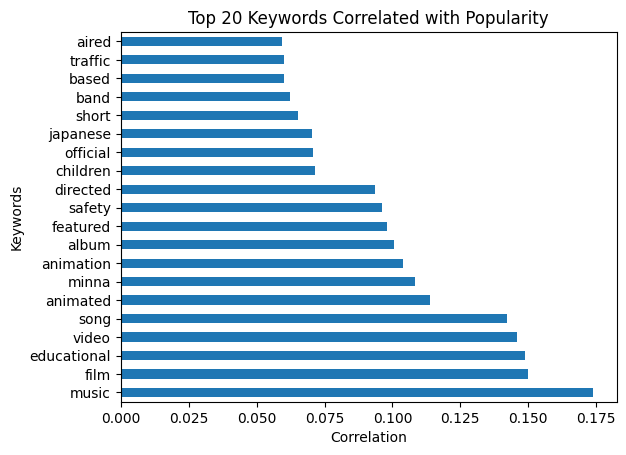

<Figure size 1000x800 with 0 Axes>

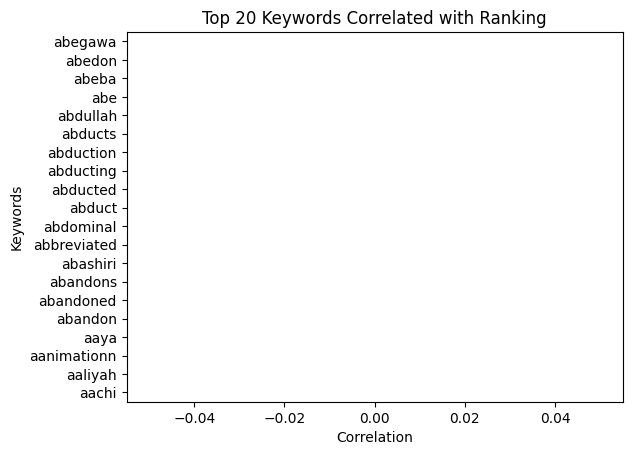

In [42]:
vectorizer = CountVectorizer(tokenizer=lambda x: x, lowercase=False)
keyword_matrix = vectorizer.fit_transform(reviews_df['keywords'])

popularity = reviews_df['popularity'].values
ranked = reviews_df['ranked'].values

def sparse_corr(x, y):
    x = csr_matrix(x)
    mean_x = np.array(x.mean(axis=0)).flatten()
    mean_y = np.mean(y)
    y_centered = y - mean_y
    y_centered = csr_matrix(y_centered).T  # Convert to sparse matrix and transpose for correct dimensions
    cov = np.array(x.multiply(y_centered).mean(axis=0)).flatten()
    std_x = np.sqrt(np.array(x.power(2).mean(axis=0) - np.square(mean_x)).flatten())
    std_y = np.std(y)
    corr = cov / (std_x * std_y)
    return corr

corr_popularity = sparse_corr(keyword_matrix, popularity)
corr_ranked = sparse_corr(keyword_matrix, ranked)

keywords = vectorizer.get_feature_names_out()
keyword_corr_df = pd.DataFrame({
    'keyword': keywords,
    'corr_popularity': corr_popularity,
    'corr_ranked': corr_ranked
})

keyword_corr_popularity = keyword_corr_df.sort_values(by='corr_popularity', ascending=False)
keyword_corr_ranking = keyword_corr_df.sort_values(by='corr_ranked', ascending=False)

print("Top Keywords Correlated with Popularity:\n", keyword_corr_popularity.head(10))
print("\nTop Keywords Correlated with Ranking:\n", keyword_corr_ranking.head(10))

def plot_correlations(df, metric, title):
    plt.figure(figsize=(10, 8))
    df.head(20).plot(kind='barh', x='keyword', y=metric, legend=False)
    plt.title(title)
    plt.xlabel('Correlation')
    plt.ylabel('Keywords')
    plt.show()

plot_correlations(keyword_corr_popularity, 'corr_popularity', 'Top 20 Keywords Correlated with Popularity')
plot_correlations(keyword_corr_ranking, 'corr_ranked', 'Top 20 Keywords Correlated with Ranking')